In [24]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import analysis

In [34]:
result_summary = pd.read_csv("summary.csv")
result_summary.tail(25)

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
30,2025-05-26 14:14,Dropout:0.5,data/run/2025-05-26 13:51/config_0.5.toml,data/result/2025-05-26 14:14_Dropout:0.5/loss.dat,data/result/2025-05-26 14:14_Dropout:0.5/val_l...,11.452439,1.048734,11.404320,data/result/2025-05-26 14:14_Dropout:0.5/resul...,0:10:29.919106,0.5
31,2025-05-26 14:14,Dropout:0.8,data/run/2025-05-26 13:51/config_0.8.toml,data/result/2025-05-26 14:14_Dropout:0.8/loss.dat,data/result/2025-05-26 14:14_Dropout:0.8/val_l...,44.920288,2.352241,44.858658,data/result/2025-05-26 14:14_Dropout:0.8/resul...,0:10:30.122135,0.8
32,2025-05-26 14:14,Dropout:0.6,data/run/2025-05-26 13:51/config_0.6.toml,data/result/2025-05-26 14:14_Dropout:0.6/loss.dat,data/result/2025-05-26 14:14_Dropout:0.6/val_l...,18.133798,2.239549,17.994973,data/result/2025-05-26 14:14_Dropout:0.6/resul...,0:10:30.877675,0.6
33,2025-06-01 17:44,Dataset=10.0%,data/run/2025-05-28 12:40/config_0.10.toml,data/result/2025-06-01 17:44_Dataset=10.0%/los...,data/result/2025-06-01 17:44_Dataset=10.0%/val...,3.543430,-0.329118,3.528112,data/result/2025-06-01 17:44_Dataset=10.0%/res...,0:03:06.837320,0.1
34,2025-06-01 17:47,Dataset=20.0%,data/run/2025-05-28 12:40/config_0.20.toml,data/result/2025-06-01 17:47_Dataset=20.0%/los...,data/result/2025-06-01 17:47_Dataset=20.0%/val...,4.871954,4.144711,2.560725,data/result/2025-06-01 17:47_Dataset=20.0%/res...,0:03:48.768381,0.2
35,2025-06-01 17:51,Dataset=30.0%,data/run/2025-05-28 12:40/config_0.30.toml,data/result/2025-06-01 17:51_Dataset=30.0%/los...,data/result/2025-06-01 17:51_Dataset=30.0%/val...,2.060528,1.031549,1.783727,data/result/2025-06-01 17:51_Dataset=30.0%/res...,0:04:54.180813,0.3
36,2025-06-01 17:56,Dataset=40.0%,data/run/2025-05-28 12:40/config_0.40.toml,data/result/2025-06-01 17:56_Dataset=40.0%/los...,data/result/2025-06-01 17:56_Dataset=40.0%/val...,2.626278,1.657691,2.037007,data/result/2025-06-01 17:56_Dataset=40.0%/res...,0:05:50.532444,0.4
37,2025-06-01 18:02,Dataset=50.0%,data/run/2025-05-28 12:40/config_0.50.toml,data/result/2025-06-01 18:02_Dataset=50.0%/los...,data/result/2025-06-01 18:02_Dataset=50.0%/val...,2.888641,1.679344,2.350329,data/result/2025-06-01 18:02_Dataset=50.0%/res...,0:06:36.768601,0.5
38,2025-06-01 18:09,Dataset=60.0%,data/run/2025-05-28 12:40/config_0.60.toml,data/result/2025-06-01 18:09_Dataset=60.0%/los...,data/result/2025-06-01 18:09_Dataset=60.0%/val...,1.063425,-0.715106,0.787081,data/result/2025-06-01 18:09_Dataset=60.0%/res...,0:07:38.641231,0.6
39,2025-06-01 18:16,Dataset=70.0%,data/run/2025-05-28 12:40/config_0.70.toml,data/result/2025-06-01 18:16_Dataset=70.0%/los...,data/result/2025-06-01 18:16_Dataset=70.0%/val...,1.054495,0.465120,0.946374,data/result/2025-06-01 18:16_Dataset=70.0%/res...,0:08:35.102921,0.7


In [39]:
def plot_rms(x, y, x_label):
    fig, ax = plt.subplots()

    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel("RMS Deviation (MeV)")
    ax.set_ylim(bottom=0)
    analysis.plot.set_tick(ax)

In [ ]:
training_percentage_df = result_summary.iloc[33:43].sort_values(by="note")
training_percentage_df["note"] = training_percentage_df["note"].astype(float)

plot_rms(
    training_percentage_df["note"] * 80,
    training_percentage_df["rms_dev"],
    "% Training Data",
)

TypeError: plot_rms() takes 3 positional arguments but 4 were given

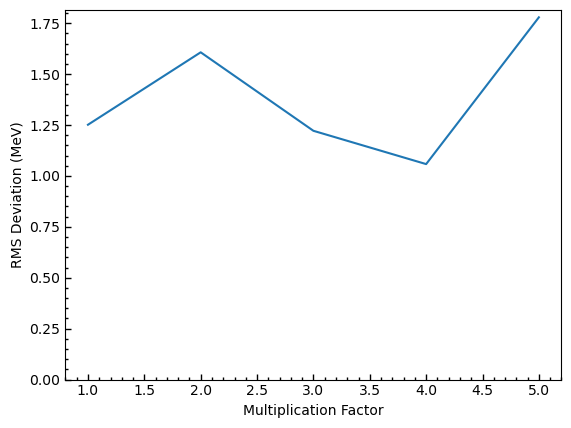

In [32]:
mult_layer_df = result_summary.iloc[62:67].sort_values(by="note")
mult_layer_df["note"] = mult_layer_df["note"].astype(int)

plot_rms(
    mult_layer_df["note"],
    mult_layer_df["rms_dev"],
    "Multiplication Factor",
    "RMS Deviation (MeV)",
)